In [1]:
!git lfs clone https://github.com/hnu-digihealth/patho-pix.git

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'patho-pix'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 418 (delta 90), reused 115 (delta 39), pack-reused 221
Receiving objects: 100% (418/418), 3.25 MiB | 16.92 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [2]:
%cd patho-pix
!git checkout notebook

/content/patho-pix
Branch 'notebook' set up to track remote branch 'notebook' from 'origin'.
Switched to a new branch 'notebook'


In [3]:
!pip install .

Processing /content/patho-pix
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.0/359.0 kB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at mult

# Introduction to Patho-Pix: Whole Slide Image Preprocessing for Pathology

Welcome to the UKSH Healthcare Hackathon! We are excited to present **Patho-Pix**, a cutting-edge framework designed to streamline the preprocessing of whole slide images (WSIs) in pathology. This Jupyter notebook will guide you through the key features and functionalities of Patho-Pix, demonstrating its potential to enhance the efficiency and accuracy of digital pathology workflows.

## Why Whole Slide Imaging?

Whole slide imaging (WSI) represents a significant advancement in pathology, allowing for the digitization of entire histological slides at high resolution. This technology facilitates remote diagnostics, educational initiatives, and computational pathology research. However, the sheer size and complexity of WSIs pose substantial challenges for data management, processing, and analysis.

## The Need for Preprocessing

Effective preprocessing of WSIs is crucial for several reasons:
- **Quality Enhancement**: Enhancing image quality by correcting artifacts, normalizing stains, and balancing colors ensures more reliable analyses.
- **Data Reduction**: Reducing the data size through techniques like tiling and compression allows for more manageable storage and faster processing.
- **Feature Extraction**: Identifying and isolating regions of interest (ROIs) facilitates targeted analyses and reduces computational load.

## Introducing Patho-Pix

Patho-Pix is designed to address these challenges by providing a comprehensive suite of tools for WSI preprocessing. Our framework includes functionalities such as:

- **Tissue Masks & ROI Detection**: Automatically identify and extract regions of interest based on tissue masks for further examination.
- **Image Tiling**: Divide large WSIs into smaller, more manageable tiles for focused analysis.
- **Stain Normalization**: Standardize staining across slides to minimize variability and enhance visual consistency.
- **FUTURE OUTLOOK: Artifact Removal**: Automatically detect and correct common artifacts in pathology slides.

## Demonstration Overview

In this notebook, we will walk you through the core capabilities of Patho-Pix, showcasing its application to sample WSIs. You will see how our framework can transform raw slide images into preprocessed data ready for analysis. The demonstration will cover the following steps:

1. **Loading and Visualizing WSIs**: Importing whole slide images and displaying them for initial inspection.
2. **Tiling and ROI Extraction**: Segmenting the WSIs into tiles and extracting regions of interest based on tissue masks for detailed analysis.
3. **Metadata Extraction**: Utilize additional metadata beside purely imaging for later artificial intelligence models.
4. **Stain Normalization**: Standardizing the color profiles of the slides to ensure uniformity.

By the end of this demonstration, you will have a clear understanding of how Patho-Pix can be integrated into digital pathology workflows to enhance the preprocessing of whole slide images, ultimately leading to more accurate and efficient diagnostic and research outcomes.

Let's get started!

## 0. Setup

In [6]:
!apt update && apt install -y openslide-tools

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,858 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,084 kB]
Get:13 http://archive.ubuntu.com/ubuntu 

In [7]:
import requests
import os
import tempfile
from patho_pix.utils import convert_jpeg_to_tiff

# Download images
url_img = "http://glioblastoma.alleninstitute.org/cgi-bin/imageservice?path=" + \
           "/external/gbm/prod0/0534338971/0534338971.aff&mime=1&fileout=100125374_2." + \
           "jpg&zoom=9&top=20608&left=55168&width=15040&height=18048"
url_mask = "http://glioblastoma.alleninstitute.org/cgi-bin/imageservice?path=" + \
          "/external/gbm/prod0/0534338827/0534338827_annotation.aff&mime=1" + \
          "&fileout=100122048_1.jpg&zoom=9&top=20224&left=57888&width=15040&height=18048"

# Create temporary directory for dummy data
tmp_data = tempfile.TemporaryDirectory(prefix="tmp.patho-pix.")
# Download dummy image
print("Downloading dummy image")
response = requests.get(url_img)
if response.status_code == 200:
    path_img = os.path.join(tmp_data.name, "image.jpg")
    with open(path_img, "wb") as fd:
        fd.write(response.content)
# Download dummy mask
print("Downloading dummy mask")
response = requests.get(url_mask)
if response.status_code == 200:
    path_mask = os.path.join(tmp_data.name, "mask.jpg")
    with open(path_mask, "wb") as fd:
        fd.write(response.content)
# convert to tiff
convert_jpeg_to_tiff(path_img, path_img.replace(".jpg", ".tiff"))
convert_jpeg_to_tiff(path_mask, path_mask.replace(".jpg", ".tiff"))
path_img = path_img.replace(".jpg", ".tiff")
path_mask = path_mask.replace(".jpg", ".tiff")

## 1. Loading and Visualizing WSIs

In this chapter, we will cover the process of importing whole slide images (WSIs) into our Patho-Pix framework and displaying them for initial inspection. This step is crucial as it allows us to visually assess the quality and characteristics of the slides before applying any preprocessing techniques. We will demonstrate how to load WSIs from a common pathology file format (BigTiff) and explore basic visualization tools to navigate and examine the high-resolution images as simplistic thumbnails.

In [9]:
# Load scans
from patho_pix.io import load_mask, load_wsi

tile_dir_img = tempfile.TemporaryDirectory(prefix="tmp.patho-pix.img")
wsi = load_wsi(path_img, tile_dir_img.name)

tile_dir_mask = tempfile.TemporaryDirectory(prefix="tmp.patho-pix.mask")
mask = load_mask(path_mask, tile_dir_mask.name)

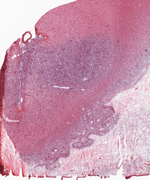

In [10]:
# Create thumbnail for image
wsi.thumbnail

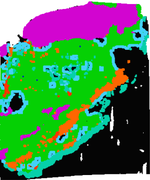

In [11]:
# Create thumbnail for mask
mask.thumbnail

## 2. Tiling and ROI Extraction via Tissue Mask

In this chapter, we will delve into the process of segmenting whole slide images (WSIs) into smaller, manageable tiles and extracting regions of interest (ROIs). Tiling is essential for handling the large size of WSIs, making it easier to focus on specific areas for detailed analysis. We will demonstrate how Patho-Pix automates the tiling process and efficiently identifies and extracts ROIs, ensuring that critical pathological features are highlighted for further examination.


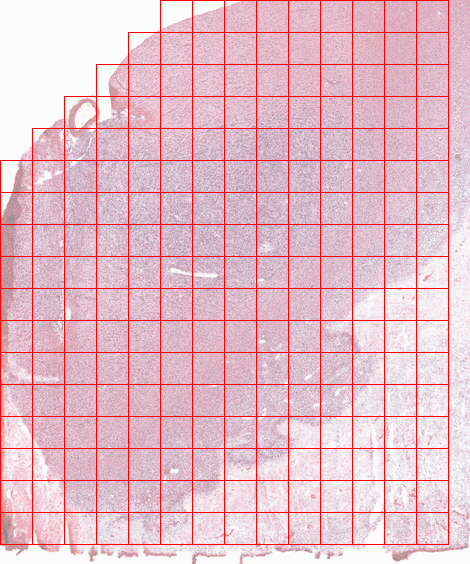

In [12]:
# preview tiling
from patho_pix.utils import AwesomeTiler
wsi_tiler = AwesomeTiler(
    tile_size=(1024, 1024),
    check_tissue=True,
    tissue_percent=10.0,
    prefix="patho-fix.",
    suffix=".png",
)
wsi_tiler.locate_tiles(wsi)

In [13]:
# run tiling
from patho_pix.tiling import tile_wsi_mask
metadata = tile_wsi_mask(wsi, mask)

INFO:tiler:	 Image Tile 0 saved: patho-fix.tile_0_level0_0-6144-1024-7168.png
INFO:tiler:	 Mask Tile 0 saved: patho-fix.tile_0_level0_0-6144-1024-7168.png
INFO:tiler:	 Image Tile 1 saved: patho-fix.tile_1_level0_0-7168-1024-8192.png
INFO:tiler:	 Mask Tile 1 saved: patho-fix.tile_1_level0_0-7168-1024-8192.png
INFO:tiler:	 Image Tile 2 saved: patho-fix.tile_2_level0_0-8192-1024-9216.png
INFO:tiler:	 Mask Tile 2 saved: patho-fix.tile_2_level0_0-8192-1024-9216.png
INFO:tiler:	 Image Tile 3 saved: patho-fix.tile_3_level0_0-9216-1024-10240.png
INFO:tiler:	 Mask Tile 3 saved: patho-fix.tile_3_level0_0-9216-1024-10240.png
INFO:tiler:	 Image Tile 4 saved: patho-fix.tile_4_level0_0-10240-1024-11264.png
INFO:tiler:	 Mask Tile 4 saved: patho-fix.tile_4_level0_0-10240-1024-11264.png
INFO:tiler:	 Image Tile 5 saved: patho-fix.tile_5_level0_0-11264-1024-12288.png
INFO:tiler:	 Mask Tile 5 saved: patho-fix.tile_5_level0_0-11264-1024-12288.png
INFO:tiler:	 Image Tile 6 saved: patho-fix.tile_6_level0_0-1

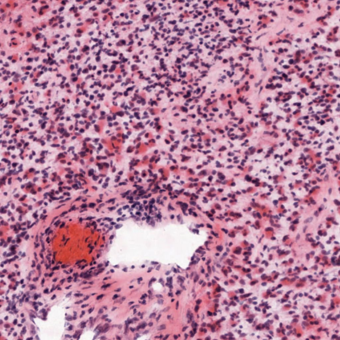

In [19]:
# demonstrate tile example
from PIL import Image
image = Image.open(os.path.join(tile_dir_img.name, os.listdir(tile_dir_img.name)[40]))
image.resize((340,340))

In [20]:
# show tile files
os.listdir(tile_dir_img.name)

['patho-fix.tile_172_level0_11264-3072-12288-4096.png',
 'patho-fix.tile_105_level0_7168-4096-8192-5120.png',
 'patho-fix.tile_37_level0_2048-16384-3072-17408.png',
 'patho-fix.tile_152_level0_10240-0-11264-1024.png',
 'patho-fix.tile_160_level0_10240-8192-11264-9216.png',
 'patho-fix.tile_68_level0_5120-1024-6144-2048.png',
 'patho-fix.tile_219_level0_13312-16384-14336-17408.png',
 'patho-fix.tile_15_level0_1024-8192-2048-9216.png',
 'patho-fix.tile_56_level0_4096-5120-5120-6144.png',
 'patho-fix.tile_189_level0_12288-3072-13312-4096.png',
 'patho-fix.tile_12_level0_1024-5120-2048-6144.png',
 'patho-fix.tile_106_level0_7168-5120-8192-6144.png',
 'patho-fix.tile_212_level0_13312-9216-14336-10240.png',
 'patho-fix.tile_158_level0_10240-6144-11264-7168.png',
 'patho-fix.tile_186_level0_12288-0-13312-1024.png',
 'patho-fix.tile_118_level0_8192-0-9216-1024.png',
 'patho-fix.tile_78_level0_5120-11264-6144-12288.png',
 'patho-fix.tile_112_level0_7168-11264-8192-12288.png',
 'patho-fix.tile_1

## 3. Metadata

Metadata plays a crucial role in the analysis and interpretation of whole slide images (WSIs). It provides essential information about the image, such as dimensions, resolution, and tissue composition. One important aspect of metadata extraction is determining the tissue percentage per tile, which involves calculating the proportion of tissue versus non-tissue areas within each segmented tile. This metric helps pathologists and researchers focus on the most relevant regions, facilitating more accurate diagnoses and analyses. Patho-Pix includes tools to automatically extract and analyze such metadata, enhancing the efficiency and effectiveness of digital pathology workflows.

In [14]:
# extract metadata
import pandas as pd
df = pd.DataFrame.from_dict(metadata, orient="index", columns=["percentage_tissue"])
print(df)


                                                    percentage_tissue
patho-fix.tile_0_level0_0-6144-1024-7168.png                 0.673714
patho-fix.tile_1_level0_0-7168-1024-8192.png                 0.721839
patho-fix.tile_2_level0_0-8192-1024-9216.png                 0.728118
patho-fix.tile_3_level0_0-9216-1024-10240.png                0.656387
patho-fix.tile_4_level0_0-10240-1024-11264.png               0.575243
...                                                               ...
patho-fix.tile_215_level0_13312-12288-14336-133...           0.245751
patho-fix.tile_216_level0_13312-13312-14336-143...           0.222454
patho-fix.tile_217_level0_13312-14336-14336-153...           0.196838
patho-fix.tile_218_level0_13312-15360-14336-163...           0.310141
patho-fix.tile_219_level0_13312-16384-14336-174...           0.372598

[220 rows x 1 columns]


## 4. Stain Normalization

Future work